In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Prestige_B01338.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Federal_02216.csv
/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-ne

# Data Preparation Part

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO 
import seaborn as sns
from sklearn.cluster import KMeans
import geopandas as gpd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
df.head(5)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [6]:
combined_data = pd.DataFrame()
path = '/kaggle/input/uber-pickups-in-new-york-city'
req_dir = 'uber-raw-data-'

for filename in os.listdir(path):
    if len(filename) == 23 and filename.startswith(req_dir):
        print(filename)
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path)
        
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        
        combined_data = pd.concat([combined_data, df])

uber-raw-data-may14.csv
uber-raw-data-apr14.csv
uber-raw-data-jul14.csv
uber-raw-data-jun14.csv
uber-raw-data-sep14.csv
uber-raw-data-aug14.csv


In [7]:
combined_data.head()

,Date/Time,Lat,Lon,Base
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512


In [8]:
df = combined_data
df.isnull().values.any()

False

# TEMPORAL ANALYSIS

### distribution by time

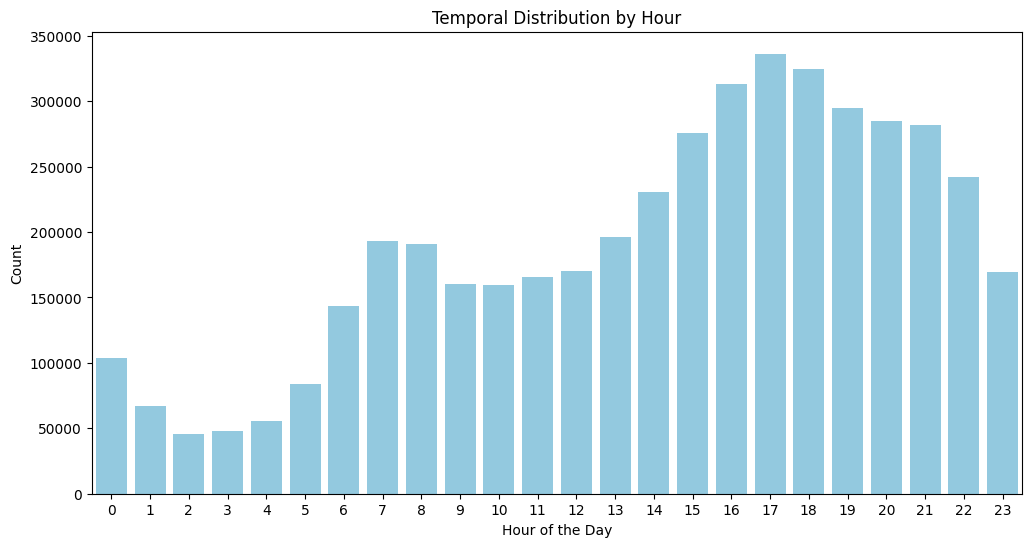

In [9]:
df['Hour'] = df['Date/Time'].dt.hour
# Group by hour and get the count
hourly_analysis = df.groupby('Hour').size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Count', data=hourly_analysis, color='skyblue')
plt.title('Temporal Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

### distribution by day of the week

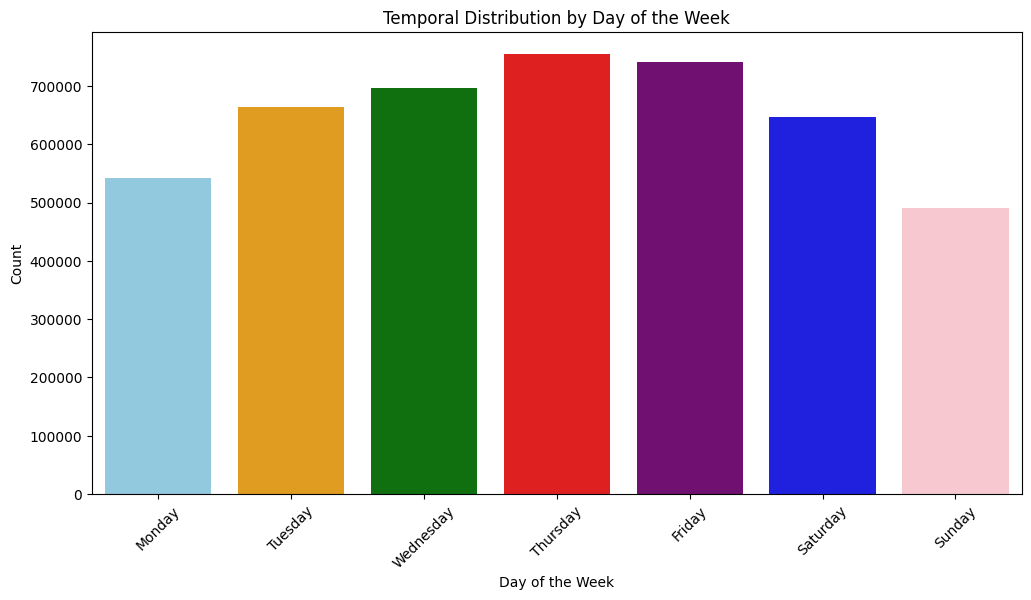

In [10]:
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek

# Group by day of the week and get the count
day_of_week_analysis = df.groupby('DayOfWeek').size().reset_index(name='Count')

# Define day names for plotting
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define a custom color palette for each day
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'blue', 'pink']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Count', data=day_of_week_analysis, palette=colors)
plt.title('Temporal Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)  # Use day names as x-axis labels
plt.show()

### distribution by hour of the day

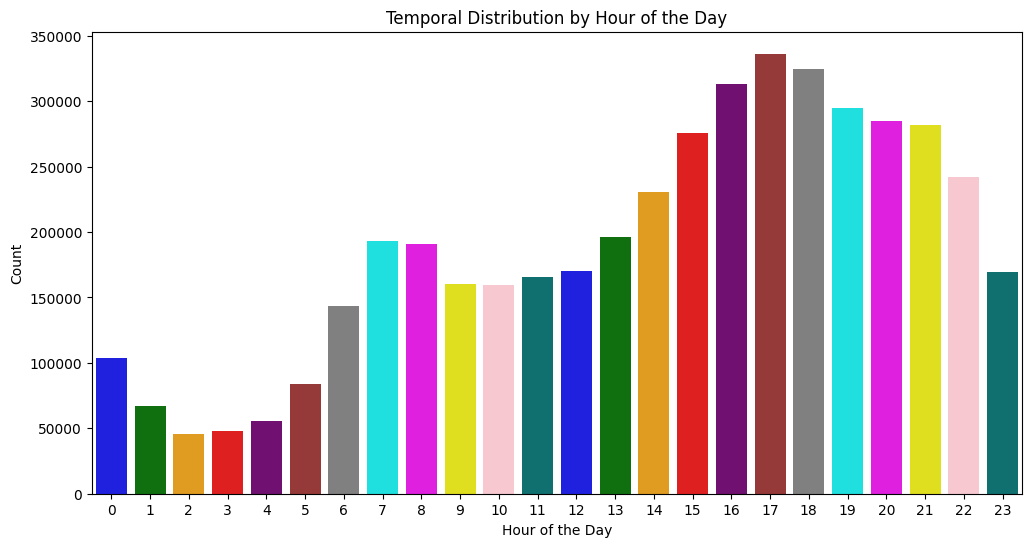

In [11]:
# Extract the hour of the day
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and get the count
hourly_analysis = df.groupby('Hour').size().reset_index(name='Count')

# Define a custom color palette for each hour of the day
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'gray', 'cyan', 'magenta', 'yellow', 'pink', 'teal']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Count', data=hourly_analysis, palette=colors)
plt.title('Temporal Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

## SPATIAL ANALYSIS

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


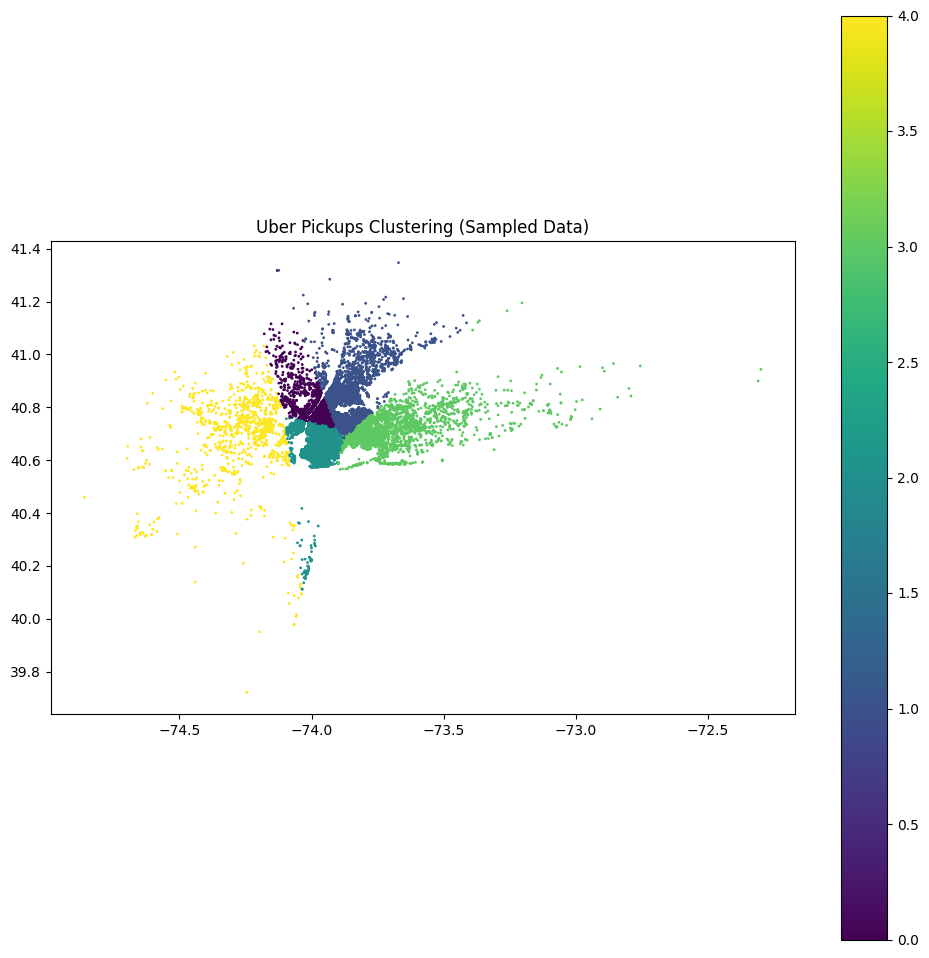

In [17]:
# Sample and round the data
sampled_data = df.sample(frac=0.1)  # 10% of the data for faster processing
sampled_data['Lat'] = sampled_data['Lat'].round(4)
sampled_data['Lon'] = sampled_data['Lon'].round(4)

# Perform clustering (e.g., K-Means)
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
sampled_data['Cluster'] = kmeans.fit_predict(sampled_data[['Lon', 'Lat']])

# Create a GeoDataFrame for visualization
gdf = gpd.GeoDataFrame(sampled_data, geometry=gpd.points_from_xy(sampled_data['Lon'], sampled_data['Lat']))

# Plot the clusters on a map
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(column='Cluster', cmap='viridis', markersize=1, ax=ax, legend=True)
ax.set_title('Uber Pickups Clustering (Sampled Data)')

# Save the map to a file
plt.savefig('uber_pickups_clusters_sampled.png')
plt.show()

## Customer Behaviour Analysis

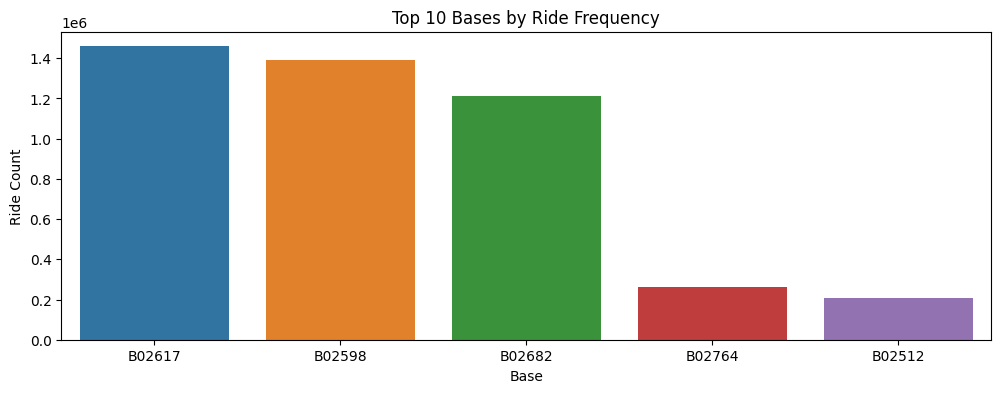

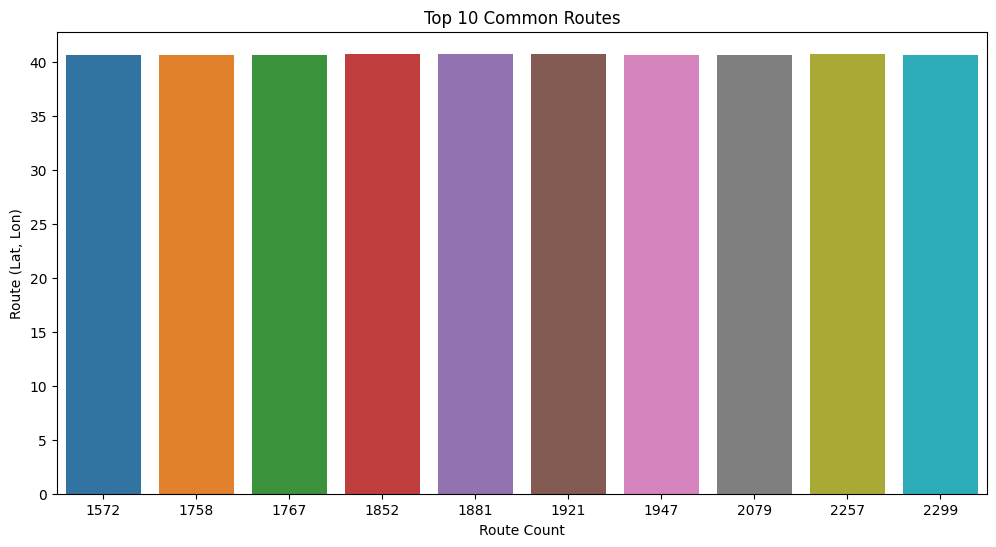

In [26]:
# Calculate ride frequency for each user
ride_frequency = df['Base'].value_counts().reset_index()
ride_frequency.columns = ['Base', 'ride_count']

# Most Common Routes (Start-End Combinations)
common_routes = df.groupby(['Lat', 'Lon']).size().reset_index(name='route_count')
common_routes = common_routes.sort_values(by='route_count', ascending=False)

# Visualize Ride Frequency
plt.figure(figsize=(12, 4))
sns.barplot(x='Base', y='ride_count', data=ride_frequency.head(10))
plt.title('Top 10 Bases by Ride Frequency')
plt.xlabel('Base')
plt.ylabel('Ride Count')
plt.show()

# Visualize Most Common Routes
plt.figure(figsize=(12, 6))
sns.barplot(x='route_count', y='Lat', data=common_routes.head(10))
plt.title('Top 10 Common Routes')
plt.xlabel('Route Count')
plt.ylabel('Route (Lat, Lon)')
plt.show()